In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class K_means():
    def __init__(self,k):
        self.k=k
        self.dimension=None
        self.centers=None
        self.last_centers=None
        self.clusters=[]
        self.longest_dist = False
    
    def oclidian_dist(self,s1,s2):
        temp=0
        for d in range(len(s1)):
            temp+= (s1[d] - s2[d])**2
        return np.sqrt(temp)
    
    def cluster_cent(self, cluster):
        clus=np.array(cluster)
        cent=[]
        for d in range(self.dimension):
            cent.append(np.mean(clus[:,d]))
        return np.array(cent)
    
    def fit(self, data ,longest_dist=False):
        self.longest_dist=longest_dist
        self.data=np.array(data)
        self.dimension=self.data.shape[1]
        self._init()
        continue_loop=True
        ss=0
        while continue_loop:
            self.clusters=[]
            for k in range(self.k):
                self.clusters.append([])
            ss+=1
            #print(ss)
            self.last_centers=self.centers.copy()
            for s in self.samples:
                temp_list=[]
                for k in range(self.k):
                    temp_list.append(self.oclidian_dist(s,self.centers[k]))
                cluster_num=np.argmin(temp_list)
                self.clusters[cluster_num].append(s)
            for k in range(self.k):
                self.centers[k]=self.cluster_cent(self.clusters[k])
            count=0
            for k in range(self.k):
                if list(self.last_centers[k]) == list(self.centers[k]):
                    count+=1
            if count >= self.k-1:
                continue_loop=False
            self.samples=self.data
        return self.clusters 
            
    def _init(self):
        if self.longest_dist == False:
            self.samples=self.data
            np.random.shuffle(self.samples)
            self.centers=self.samples[:self.k]
            self.samples=self.samples[self.k:]
            for k in range(self.k):
                self.clusters.append([])
                
        if self.longest_dist == True:
            self.centers=[]
            self.samples=self.data
            np.random.shuffle(self.samples)
            self.centers.append(self.samples[0])
            c=self.samples[0]
            for _ in range(self.k - 1):
                temp_list=[]
                for s in self.samples:
                    temp_list.append(self.oclidian_dist(s,c))
                self.centers.append(self.samples[np.argmax(temp_list)])
                c=self.cluster_cent(self.centers)
                

In [7]:
data=pd.read_csv('C:/Users/NP-soft/Desktop/data/clustering/data_1.csv')

In [8]:
km_clus=K_means(3)
clusters =km_clus.fit(data , longest_dist=False)

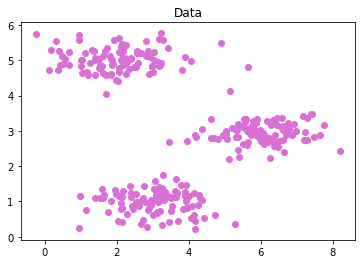

In [9]:
x=data.iloc[:,0]
y=data.iloc[:,1]
plt.scatter(x,y,c='orchid')
plt.title('Data')
plt.show()

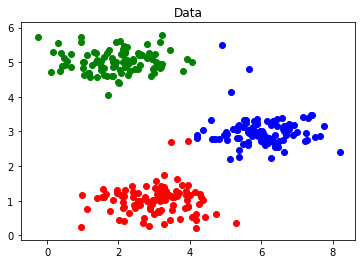

In [10]:
c1=np.array(clusters[0])
c2=np.array(clusters[1])
c3=np.array(clusters[2])
plt.scatter(c1[:,0],c1[:,1],c='blue')
plt.scatter(c2[:,0],c2[:,1],c='red')
plt.scatter(c3[:,0],c3[:,1],c='green')
plt.title('Data')
plt.show()